# Univariate linear regression with gradient descent

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Debugging
import sys
import logging
DEBUG_MODE = False
logging.basicConfig(level=logging.DEBUG if DEBUG_MODE else logging.INFO, stream=sys.stdout)
logging.getLogger().setLevel(logging.DEBUG if DEBUG_MODE else logging.INFO)

## Load data

In [175]:
# Load data
df = pd.read_csv('data.csv')
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
df.head()

,X,Y
0,0.00000,8.528105
1,0.10101,6.002335
2,0.20202,7.361516
3,0.30303,10.087847
4,0.40404,9.543197


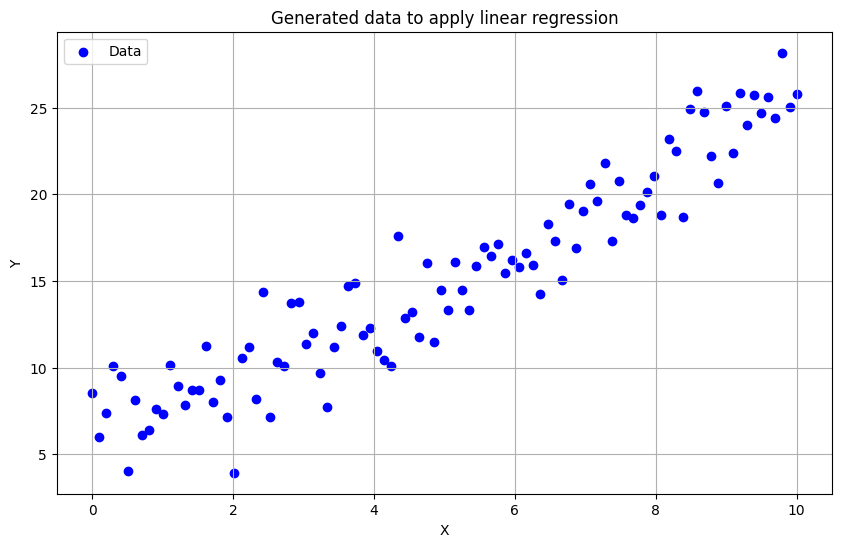

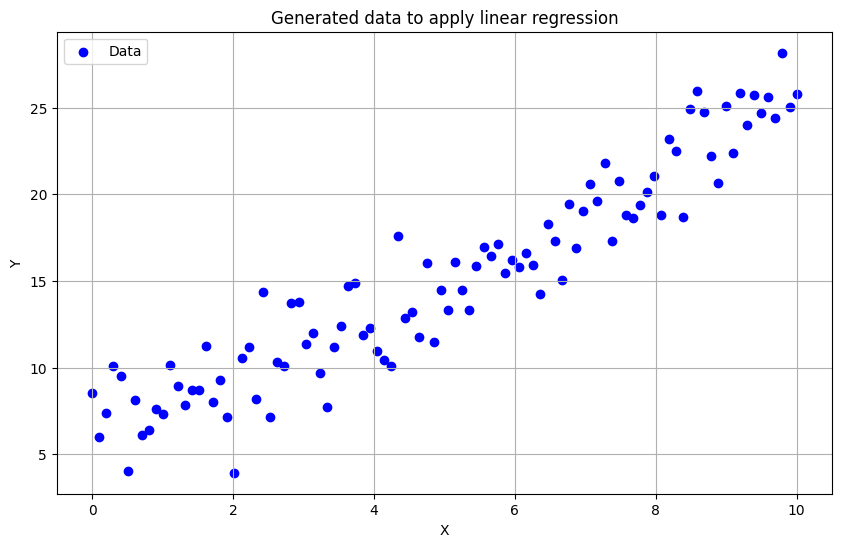

In [176]:
# Display data
def display_data(title, x, y, pred_y=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data')
    if pred_y is not None:
        plt.plot(x, pred_y, color='red', label='Prediction')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    # To be able to draw all plots together
    return plt.gcf()
display_data('Generated data to apply linear regression', x, y, None)

### First using sklearn to compare the results

In [177]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

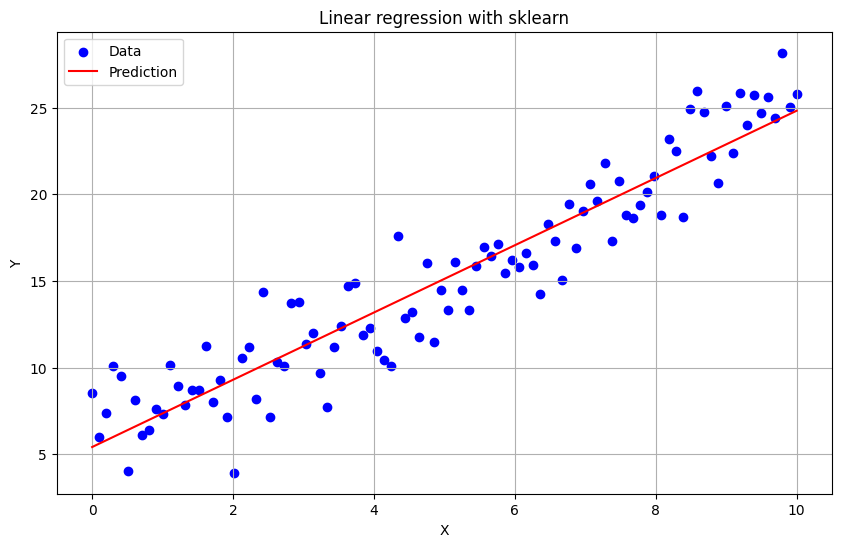

In [178]:
pred_y = lr.predict(x.reshape(-1, 1))
fig4 = display_data('Linear regression with sklearn', x, y, pred_y)

## Linear regression with pure Python and batch gradient descent (not vectorized)

In [179]:
class PurePythonLinearRegression:
    def __init__(self):
        self.weights = self.initialize_weights()

    def initialize_weights(self):
        return [0, 0]

    # This is how gradient descent minimizes the loss function
    # As it gets closer to the minimum, the derivatives will also approach zero
    # which slows down each step automatically
    def update_weights(self, learning_rate, x, y):
        new_weight0 = self.weights[0] - learning_rate*self.derivative_of_loss_function_wr_weight0(x, y)
        new_weight1 = self.weights[1] - learning_rate*self.derivative_of_loss_function_wr_weight1(x, y)
        return [new_weight0, new_weight1]

    # Predicts what the y value is from x, using the weights (trained or not)
    def weighted_prediction(self, x):
        logging.debug({
            'function': 'weighted_prediction',
            'x': x,
            'weights': self.weights
        })
        return self.weights[1]*x + self.weights[0]

    # How far are the predictions from the real values of y
    # Squared error loss function - good because it's convex
    def loss_function(self, x, y):
        total_distance = 0
        for i in range(len(x)):
            pred_y_i = self.weighted_prediction(x[i])
            total_distance += (pred_y_i - y[i])**2
            logging.debug({
                'function': 'loss_function',
                f'x[{i}]': x[i],
                f'y[{i}]': y[i],
                f'pred_y[{i}]': pred_y_i,
                'total_distance': total_distance
            })
        return (1/(2*len(x)))*total_distance

    # This is not needed when there's auto differentiation
    # The derivative of the loss is what'll guide the gradient descent to down the loss function
    def derivative_of_loss_function_wr_weight0(self, x, y):
        m = len(x)
        total_sum = 0
        for i in range(m):
            pred_y_i = self.weighted_prediction(x[i])
            total_sum += (pred_y_i - y[i])
        return (1/m)*total_sum
    def derivative_of_loss_function_wr_weight1(self, x, y):
        m = len(x)
        total_sum = 0
        for i in range(m):
            pred_y_i = self.weighted_prediction(x[i])
            total_sum += (pred_y_i - y[i])*x[i]
        return (1/m)*total_sum

    # Named train because it's iterative (unlike fit, probably)
    # The goal is to find the weights which minimize the loss function (distance between predictions and real values)
    def train(self, x, y, iterations=10, learning_rate=0.1):
        self.weights = self.initialize_weights()

        # Batch gradient descent happens here
        # "Batch" because it uses all training examples
        current_loss = self.loss_function(x, y)
        for i in range(0, iterations):
            if i % (iterations/10) == 0:
                # Only log every 1 tenth of the iterations
                logging.info(f'Iteration {i}/{iterations}\tLoss: {current_loss}')
            self.weights = self.update_weights(learning_rate, x, y)
            current_loss = self.loss_function(x, y)
        
        logging.info(f'Final {i+1}/{iterations}\tLoss: {current_loss}\tWeights: {self.weights}')
        logging.info(f'Equation: y(x) = {self.weights[1]}x + {self.weights[0]}')
    

In [180]:
%%time
lr = PurePythonLinearRegression()
iterations = 1000
lr.train(x, y, iterations, learning_rate=0.01)
pred_y = lr.weighted_prediction(x)

INFO:root:Iteration 0/1000	Loss: 132.32530314547236
INFO:root:Iteration 100/1000	Loss: 3.95583438376778
INFO:root:Iteration 200/1000	Loss: 3.19632957013807
INFO:root:Iteration 300/1000	Loss: 2.7342895827333513
INFO:root:Iteration 400/1000	Loss: 2.4532104557417553
INFO:root:Iteration 500/1000	Loss: 2.282217732635405
INFO:root:Iteration 600/1000	Loss: 2.1781953825296996
INFO:root:Iteration 700/1000	Loss: 2.1149140385933056
INFO:root:Iteration 800/1000	Loss: 2.0764172301062156
INFO:root:Iteration 900/1000	Loss: 2.0529979382343306
INFO:root:Final 1000/1000	Loss: 2.0387509589824124	Weights: [4.999359092880067, 2.0033226040564083]
INFO:root:Equation: y(x) = 2.0033226040564083x + 4.999359092880067
CPU times: user 865 ms, sys: 0 ns, total: 865 ms
Wall time: 860 ms


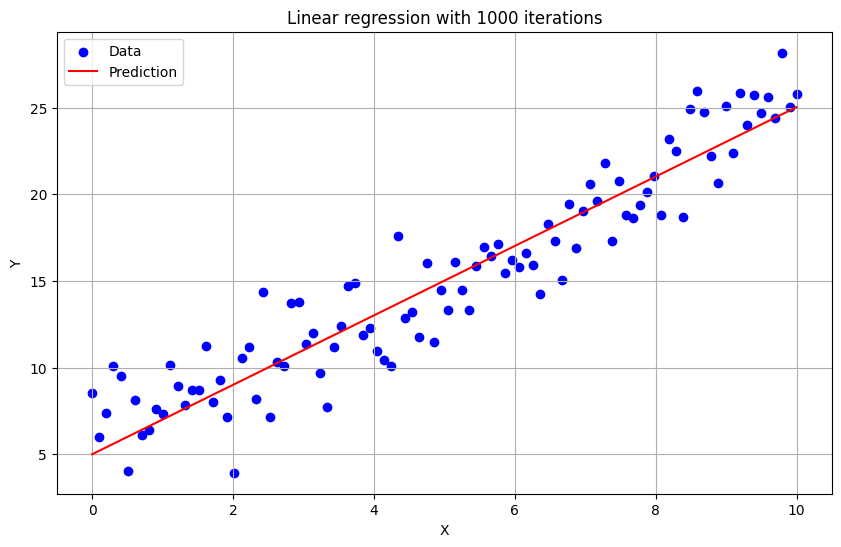

In [181]:
fig3 = display_data(f'Linear regression with {iterations} iterations', x, y, pred_y)

In [182]:
%%capture
# Capture to not show plots yet
# Just to show how different numbers of iterations affect the line position
lr2 = PurePythonLinearRegression()
lr2.train(x, y, iterations=1, learning_rate=0.01)
lr3 = PurePythonLinearRegression()
lr3.train(x, y, iterations=3, learning_rate=0.01)

pred_y2 = lr2.weighted_prediction(x)
pred_y3 = lr3.weighted_prediction(x)

fig1 = display_data('Linear regression with 1 iteration', x, y, pred_y2)
fig2 = display_data('Linear regression with 3 iteration', x, y, pred_y3)

INFO:root:Iteration 0/1	Loss: 132.32530314547236
INFO:root:Final 1/1	Loss: 60.13788363362577	Weights: [0.1511961603106897, 0.9209589137881014]
INFO:root:Equation: y(x) = 0.9209589137881014x + 0.1511961603106897
INFO:root:Iteration 0/3	Loss: 132.32530314547236
INFO:root:Final 3/3	Loss: 15.424376670691009	Weights: [0.3271891855521266, 1.922862756484824]
INFO:root:Equation: y(x) = 1.922862756484824x + 0.3271891855521266


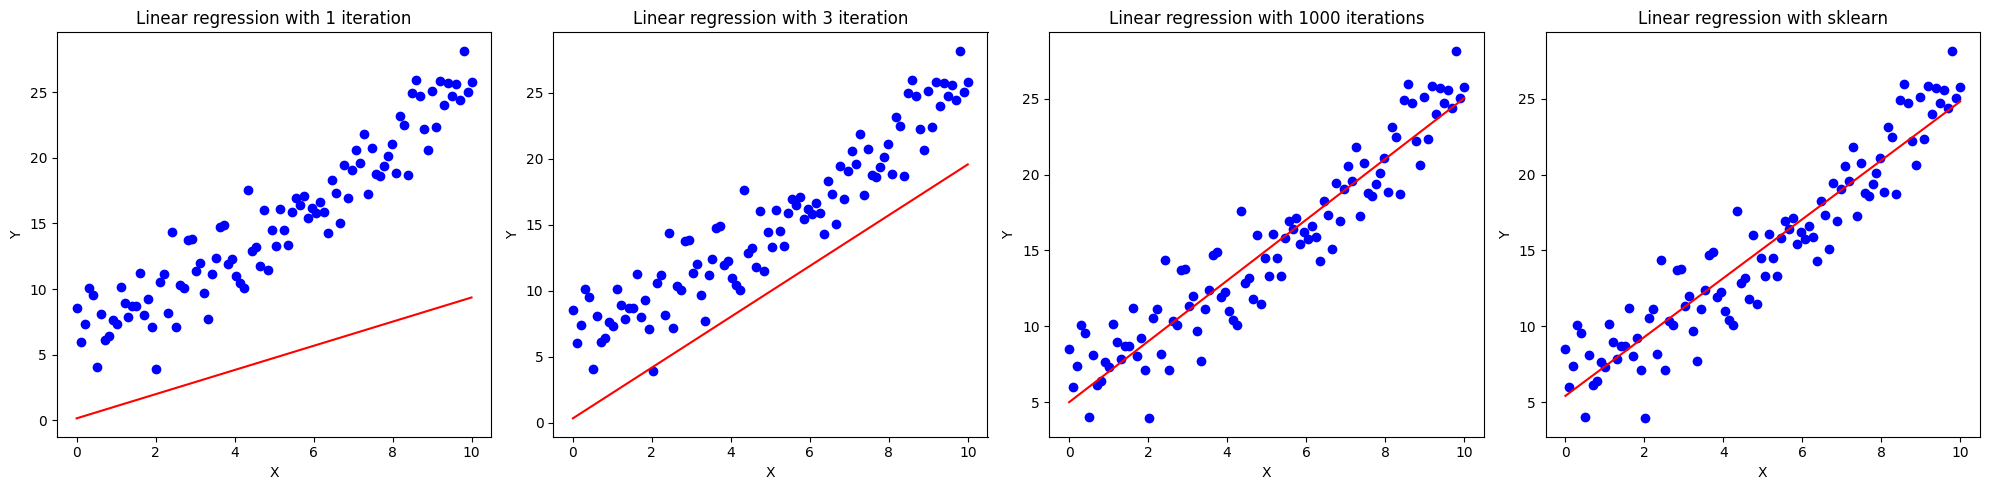

In [183]:
stored_figs = [fig1, fig2, fig3, fig4]

def display_all_together(figures):
    n = len(figures)
    fig, axs = plt.subplots(1, n, figsize=(5*n, 5))
    
    for i, ax in enumerate(axs):
        # Plot the lines
        for line in figures[i].axes[0].lines:
            ax.plot(line.get_xdata(), line.get_ydata(), color=line.get_color())
        
        # Plot the scatter points
        for collection in figures[i].axes[0].collections:
            scatter_data = collection.get_offsets()
            ax.scatter(scatter_data[:, 0], scatter_data[:, 1], color=collection.get_facecolor())
        
        ax.set_title(figures[i].axes[0].get_title())
        ax.set_xlabel(figures[i].axes[0].get_xlabel())
        ax.set_ylabel(figures[i].axes[0].get_ylabel())
    
    plt.tight_layout()
    plt.show()

display_all_together(stored_figs)

## Linear regression with numpy and gradient descent (vectorized)

In [184]:
class NumpyVectorizedLinearRegression:
    def __init__(self):
        self.weights = self.initialize_weights()

    def initialize_weights(self):
        return np.zeros((2, 1))

    def update_weights(self, learning_rate, x, y):
        derivatives = np.array([[self.derivative_of_loss_function_wrt_weight0(x, y)],[self.derivative_of_loss_function_wrt_weights(x, y)]])
        return self.weights - learning_rate * derivatives

    def weighted_prediction(self, x, after_training=True):
        if after_training:
            # It needs to have a column of ones appended to it to help with the calculations related to the intercept term weight[0]
            ones_array = np.ones((x.shape[0], 1))
            x = np.concatenate((ones_array, x), axis=1)
        return np.dot(x, self.weights)

    def loss_function(self, x, y):
        pred_y = self.weighted_prediction(x, after_training=False)
        sum_of_distances = np.sum((pred_y - y)**2, axis=0)[0]
        return (1/(2*x.shape[0]))*sum_of_distances

    def derivative_of_loss_function_wrt_weights(self, x, y):
        pred_y = self.weighted_prediction(x, after_training=False)
        sum_of_stuff = np.sum((pred_y - y)*x[:,1:2], axis=0)[0]
        return (1/x.shape[0])*sum_of_stuff

    def derivative_of_loss_function_wrt_weight0(self, x, y):
        pred_y = self.weighted_prediction(x, after_training=False)
        sum_of_stuff = np.sum((pred_y - y), axis=0)[0]
        return (1/x.shape[0])*sum_of_stuff

    def train(self, x, y, iterations=10, learning_rate=0.1):
        # It needs to have a column of ones appended to it to help with the calculations related to the intercept term weight[0]
        ones_array = np.ones((x.shape[0], 1))
        x = np.concatenate((ones_array, x), axis=1)
        
        self.weights = self.initialize_weights()

        current_loss = self.loss_function(x, y)
        for i in range(0, iterations):
            if i % (iterations/10) == 0:
                logging.info(f'Iteration {i}/{iterations}\tLoss: {current_loss}')
            self.weights = self.update_weights(learning_rate, x, y)
            current_loss = self.loss_function(x, y)
        
        logging.info(f'Final {i+1}/{iterations}\tLoss: {current_loss}\tWeights: {self.weights}')
        logging.info(f'Equation: y(x) = {self.weights[1]}x + {self.weights[0]}')
    

In [185]:
# Input x is a 1D array and here is converted into a 2D vector of shape (n_examples, 1)
new_x = np.expand_dims(x, axis=0).T
new_y = np.expand_dims(y, axis=0).T

In [186]:
%%time
lr = NumpyVectorizedLinearRegression()
lr.train(new_x, new_y, iterations=1000, learning_rate=0.01)
pred_y = lr.weighted_prediction(new_x)

INFO:root:Iteration 0/1000	Loss: 132.32530314547242
INFO:root:Iteration 100/1000	Loss: 3.95583438376778
INFO:root:Iteration 200/1000	Loss: 3.19632957013807
INFO:root:Iteration 300/1000	Loss: 2.7342895827333527
INFO:root:Iteration 400/1000	Loss: 2.4532104557417567
INFO:root:Iteration 500/1000	Loss: 2.2822177326354045
INFO:root:Iteration 600/1000	Loss: 2.1781953825297
INFO:root:Iteration 700/1000	Loss: 2.114914038593305
INFO:root:Iteration 800/1000	Loss: 2.0764172301062156
INFO:root:Iteration 900/1000	Loss: 2.0529979382343306
INFO:root:Final 1000/1000	Loss: 2.0387509589824133	Weights: [[4.99935909]
 [2.0033226 ]]
INFO:root:Equation: y(x) = [2.0033226]x + [4.99935909]
CPU times: user 79.5 ms, sys: 19.6 ms, total: 99.1 ms
Wall time: 82.2 ms


This version of linear regression, that is vectorized with numpy, seems to be around 10 times faster (for 1000 iterations) than the pure python version.

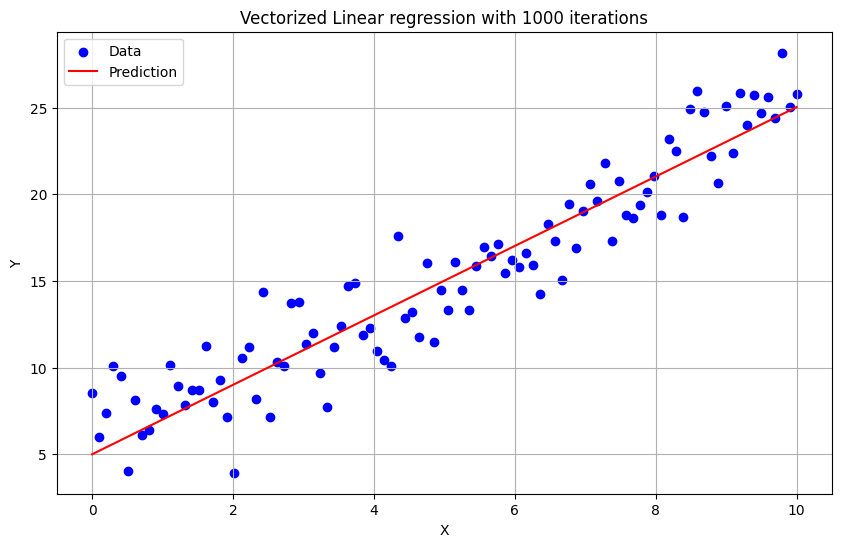

In [188]:
fig1 = display_data('Vectorized Linear regression with 1000 iterations', x, y, pred_y)

## Linear regression using tensors and auto differentiation (vectorized)